(303, 13)
(303,)
Class label: 0, Count: 138
Class label: 1, Count: 165
(242, 13)
(61, 13)
(242,)
(61,)
Confusion Matrix
[[22  5]
 [ 8 26]]


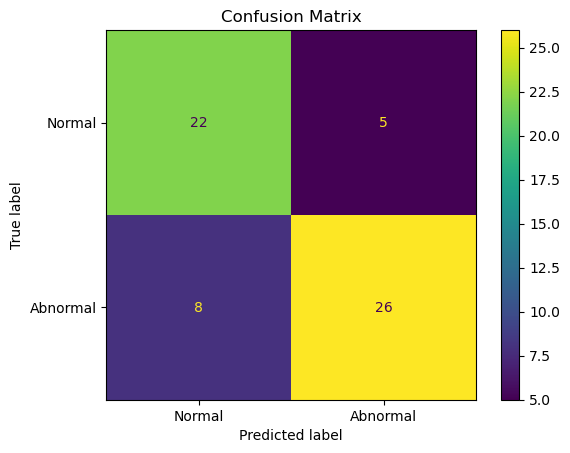

Accuracy: 78.68852459016394
Precision: 83.87096774193549
Recall: 76.47058823529412
F1 Score: 80.0
ROC AUC Score: 0.789760348583878


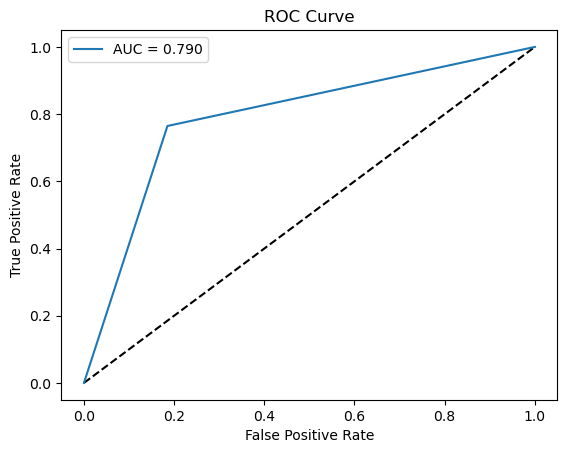

              precision    recall  f1-score   support

      Normal       0.73      0.81      0.77        27
    Abnormal       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [4]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\kavin\Downloads\heart.csv")

# Prepare features and target
X = df.drop(columns=['output'])
y = df['output']

print(X.shape)
print(y.shape)

# Count class distribution
unique_values = np.unique(y)
for value in unique_values:
    print(f"Class label: {value}, Count: {np.count_nonzero(y == value)}")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
preds = dt_model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report,
    roc_auc_score, roc_curve, auc
)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
classes = ["Normal", "Abnormal"]
cm = confusion_matrix(y_test, preds)

print("Confusion Matrix")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Performance scores
print("Accuracy:", accuracy_score(y_test, preds) * 100)
print("Precision:", precision_score(y_test, preds) * 100)
print("Recall:", recall_score(y_test, preds) * 100)
print("F1 Score:", f1_score(y_test, preds) * 100)

# ROC-AUC
roc_auc = roc_auc_score(y_test, preds)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, preds)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Classification report
target_names = ['Normal', 'Abnormal']
print(classification_report(y_test, preds, target_names=target_names))
